In [415]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [416]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,80,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,55,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,65,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,45,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [417]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [418]:
df.head()

,age,sex,chest_pain_type,bp,cholesterol,fbs_over_120,ekg_results,max_hr,exercise_angina,st_depression,slope_of_st,number_of_vessels_fluro,thallium,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,presence
1,80,0,3,115,564,0,2,160,0,1.6,2,0,7,absence
2,55,1,2,124,261,0,0,141,0,0.3,1,0,7,presence
3,65,1,4,128,263,0,0,105,1,0.2,2,1,7,absence
4,45,0,2,120,269,0,2,121,1,0.2,1,1,3,absence


In [419]:
sex_values = {
    0: "female",
    1: "male"
}
df.sex = df.sex.map(sex_values)

fbs_values = {
    0: "false",
    1: "true"
}
df.fbs_over_120 = df.fbs_over_120.map(fbs_values)

exercise_angina_values = {
    0: "no",
    1: "yes"
}
df.exercise_angina = df.exercise_angina.map(exercise_angina_values)


In [420]:
df.head()

,age,sex,chest_pain_type,bp,cholesterol,fbs_over_120,ekg_results,max_hr,exercise_angina,st_depression,slope_of_st,number_of_vessels_fluro,thallium,heart_disease
0,70,male,4,130,322,false,2,109,no,2.4,2,3,3,presence
1,80,female,3,115,564,false,2,160,no,1.6,2,0,7,absence
2,55,male,2,124,261,false,0,141,no,0.3,1,0,7,presence
3,65,male,4,128,263,false,0,105,yes,0.2,2,1,7,absence
4,45,female,2,120,269,false,2,121,yes,0.2,1,1,3,absence


In [421]:
df.heart_disease = (df.heart_disease == "presence").astype(int)

In [422]:
df.head()

,age,sex,chest_pain_type,bp,cholesterol,fbs_over_120,ekg_results,max_hr,exercise_angina,st_depression,slope_of_st,number_of_vessels_fluro,thallium,heart_disease
0,70,male,4,130,322,false,2,109,no,2.4,2,3,3,1
1,80,female,3,115,564,false,2,160,no,1.6,2,0,7,0
2,55,male,2,124,261,false,0,141,no,0.3,1,0,7,1
3,65,male,4,128,263,false,0,105,yes,0.2,2,1,7,0
4,45,female,2,120,269,false,2,121,yes,0.2,1,1,3,0


In [423]:
from sklearn.model_selection import train_test_split

In [424]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [425]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [426]:
len(df_train), len(df_val), len(df_test)

(162, 54, 54)

In [427]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [428]:
df_train

,age,sex,chest_pain_type,bp,cholesterol,fbs_over_120,ekg_results,max_hr,exercise_angina,st_depression,slope_of_st,number_of_vessels_fluro,thallium,heart_disease
0,62,female,3,130,263,false,0,97,no,1.2,2,1,7,1
1,61,female,4,145,307,false,2,146,yes,1.0,2,0,7,1
2,54,male,4,124,266,false,2,109,yes,2.2,2,1,7,1
3,58,female,4,100,248,false,2,122,no,1.0,2,0,3,0
4,68,male,3,180,274,true,2,150,yes,1.6,2,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,44,male,4,112,290,false,2,153,no,0.0,1,1,3,1
158,44,female,3,108,141,false,0,175,no,0.6,2,0,3,0
159,53,male,4,140,203,true,2,155,yes,3.1,3,0,7,1
160,62,male,4,120,267,false,0,99,yes,1.8,2,2,7,1


In [429]:
y_train = df_train.heart_disease.values
y_val = df_val.heart_disease.values
y_test = df_test.heart_disease.values

In [430]:
del df_train['heart_disease']
del df_val['heart_disease']
del df_test['heart_disease']

In [431]:
df_full_train.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
bp                         0
cholesterol                0
fbs_over_120               0
ekg_results                0
max_hr                     0
exercise_angina            0
st_depression              0
slope_of_st                0
number_of_vessels_fluro    0
thallium                   0
heart_disease              0
dtype: int64

In [432]:
df_full_train = df_full_train.reset_index(drop=True)

In [433]:
df.head()

,age,sex,chest_pain_type,bp,cholesterol,fbs_over_120,ekg_results,max_hr,exercise_angina,st_depression,slope_of_st,number_of_vessels_fluro,thallium,heart_disease
0,70,male,4,130,322,false,2,109,no,2.4,2,3,3,1
1,80,female,3,115,564,false,2,160,no,1.6,2,0,7,0
2,55,male,2,124,261,false,0,141,no,0.3,1,0,7,1
3,65,male,4,128,263,false,0,105,yes,0.2,2,1,7,0
4,45,female,2,120,269,false,2,121,yes,0.2,1,1,3,0


In [434]:
df_full_train.heart_disease.value_counts(normalize=True)

heart_disease
0    0.550926
1    0.449074
Name: proportion, dtype: float64

In [435]:
df_full_train.heart_disease.mean()

0.44907407407407407

In [436]:
df_full_train.dtypes

age                          int64
sex                         object
chest_pain_type              int64
bp                           int64
cholesterol                  int64
fbs_over_120                object
ekg_results                  int64
max_hr                       int64
exercise_angina             object
st_depression              float64
slope_of_st                  int64
number_of_vessels_fluro      int64
thallium                     int64
heart_disease                int64
dtype: object

In [437]:
numerical = ["age","bp","cholesterol","max_hr","st_depression"]

In [438]:
df_full_train.columns

Index(['age', 'sex', 'chest_pain_type', 'bp', 'cholesterol', 'fbs_over_120',
       'ekg_results', 'max_hr', 'exercise_angina', 'st_depression',
       'slope_of_st', 'number_of_vessels_fluro', 'thallium', 'heart_disease'],
      dtype='object')

In [439]:
categorical = ['sex', 'chest_pain_type', 'fbs_over_120',
       'ekg_results', 'exercise_angina',
       'slope_of_st', 'number_of_vessels_fluro', 'thallium']

In [440]:
df_full_train[categorical].nunique()

sex                        2
chest_pain_type            4
fbs_over_120               2
ekg_results                3
exercise_angina            2
slope_of_st                3
number_of_vessels_fluro    4
thallium                   3
dtype: int64

In [441]:
global_heart_disease_rate = df_full_train.heart_disease.mean()
global_heart_disease_rate

0.44907407407407407

In [442]:
heart_disease_female = df_full_train[df_full_train.sex == 'female'].heart_disease.mean()
heart_disease_female

0.25

In [443]:
heart_disease_male = df_full_train[df_full_train.sex == 'male'].heart_disease.mean()
heart_disease_male

0.5571428571428572

In [444]:
from IPython.display import display

In [445]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).heart_disease.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_heart_disease_rate
    df_group['risk'] = df_group['mean'] / global_heart_disease_rate
    display(df_group)
    print()
    print()

sex


,mean,count,diff,risk
sex,,,,
female,0.250000,76,-0.199074,0.556701
male,0.557143,140,0.108069,1.240648




chest_pain_type


,mean,count,diff,risk
chest_pain_type,,,,
1,0.214286,14,-0.234788,0.477172
2,0.205882,34,-0.243192,0.458460
3,0.229508,61,-0.219566,0.511070
4,0.682243,107,0.233169,1.519222




fbs_over_120


,mean,count,diff,risk
fbs_over_120,,,,
false,0.450549,182,0.001475,1.003285
true,0.441176,34,-0.007898,0.982414




ekg_results


,mean,count,diff,risk
ekg_results,,,,
0,0.346154,104,-0.102920,0.770817
1,1.000000,1,0.550926,2.226804
2,0.540541,111,0.091466,1.203678




exercise_angina


,mean,count,diff,risk
exercise_angina,,,,
no,0.301370,146,-0.147704,0.671092
yes,0.757143,70,0.308069,1.686009




slope_of_st


,mean,count,diff,risk
slope_of_st,,,,
1,0.271028,107,-0.178046,0.603526
2,0.630435,92,0.181361,1.403855
3,0.588235,17,0.139161,1.309885




number_of_vessels_fluro


,mean,count,diff,risk
number_of_vessels_fluro,,,,
0,0.264000,125,-0.185074,0.587876
1,0.617021,47,0.167947,1.373986
2,0.793103,29,0.344029,1.766086
3,0.800000,15,0.350926,1.781443




thallium


,mean,count,diff,risk
thallium,,,,
3,0.196721,122,-0.252353,0.438060
6,0.625000,8,0.175926,1.391753
7,0.790698,86,0.341624,1.760729


In [446]:
from sklearn.metrics import mutual_info_score

In [447]:
def mutual_info_heart_disease_score(series):
    return mutual_info_score(series, df_full_train.heart_disease)

In [448]:
mi = df_full_train[categorical].apply(mutual_info_heart_disease_score)
mi.sort_values(ascending=False)

thallium                   0.179138
chest_pain_type            0.112424
number_of_vessels_fluro    0.105918
exercise_angina            0.094620
slope_of_st                0.064628
sex                        0.045073
ekg_results                0.022870
fbs_over_120               0.000024
dtype: float64

In [449]:
df_full_train[numerical].corrwith(df_full_train.heart_disease).abs()

age              0.204550
bp               0.175619
cholesterol      0.098109
max_hr           0.411571
st_depression    0.405581
dtype: float64

In [450]:
from sklearn.feature_extraction import DictVectorizer

In [451]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [452]:
dv = DictVectorizer(sparse=False)

In [453]:
X_train = dv.fit_transform(train_dicts)

In [454]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [455]:
X_val = dv.transform(val_dicts)

In [456]:
from sklearn.linear_model import LogisticRegression

In [457]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/dell/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [458]:
model.predict(X_train)

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0])

In [459]:
model.predict_proba(X_train)

array([[0.27441019, 0.72558981],
       [0.2138076 , 0.7861924 ],
       [0.00833254, 0.99166746],
       [0.77908673, 0.22091327],
       [0.21370307, 0.78629693],
       [0.26071027, 0.73928973],
       [0.02911291, 0.97088709],
       [0.90579712, 0.09420288],
       [0.98527762, 0.01472238],
       [0.99033416, 0.00966584],
       [0.55106069, 0.44893931],
       [0.02980656, 0.97019344],
       [0.97396305, 0.02603695],
       [0.8099471 , 0.1900529 ],
       [0.93101253, 0.06898747],
       [0.99548215, 0.00451785],
       [0.06204985, 0.93795015],
       [0.08724911, 0.91275089],
       [0.982644  , 0.017356  ],
       [0.86695255, 0.13304745],
       [0.80958188, 0.19041812],
       [0.95779989, 0.04220011],
       [0.79763932, 0.20236068],
       [0.94808401, 0.05191599],
       [0.02979706, 0.97020294],
       [0.02036849, 0.97963151],
       [0.74403507, 0.25596493],
       [0.96744137, 0.03255863],
       [0.84856512, 0.15143488],
       [0.08706716, 0.91293284],
       [0.

In [460]:
y_pred = model.predict_proba(X_train)[:,1]

In [461]:
heart_disease_decision = (y_pred >= 0.5)

In [462]:
heart_disease_decision

array([ True,  True,  True, False,  True,  True,  True, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False, False, False, False, False, False,  True,  True, False,
       False, False,  True,  True, False,  True,  True, False, False,
        True, False, False,  True,  True, False,  True,  True, False,
       False,  True, False,  True, False,  True, False,  True,  True,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False,  True, False, False,  True,  True, False,
       False,  True,  True,  True, False,  True, False,  True,  True,
        True, False, False, False,  True, False,  True,  True, False,
       False,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False,  True,  True, False,  True,  True,  True,
       False, False, False,  True, False, False,  True, False, False,
       False, False,  True,  True,  True,  True,  True, False, False,
        True, False,

In [463]:
(y_train == heart_disease_decision).mean()

0.8950617283950617

In [464]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = heart_disease_decision.astype(int)
df_pred['actual'] = y_train

In [465]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [466]:
df_pred

,probability,prediction,actual,correct
0,0.725590,1,1,True
1,0.786192,1,1,True
2,0.991667,1,1,True
3,0.220913,0,0,True
4,0.786297,1,1,True
...,...,...,...,...
157,0.336313,0,1,False
158,0.009008,0,0,True
159,0.934380,1,1,True
160,0.992243,1,1,True


In [467]:
df_pred.correct.mean()

0.8950617283950617

In [474]:
model = LogisticRegression()
model.fit(X_val, y_val)

/home/dell/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [475]:
y_pred = model.predict_proba(X_val)[:,1]

In [476]:
heart_disease_decision

array([ True,  True,  True, False,  True,  True,  True, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False, False, False, False, False, False,  True,  True, False,
       False, False,  True,  True, False,  True,  True, False, False,
        True, False, False,  True,  True, False,  True,  True, False,
       False,  True, False,  True, False,  True, False,  True,  True,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False,  True, False, False,  True,  True, False,
       False,  True,  True,  True, False,  True, False,  True,  True,
        True, False, False, False,  True, False,  True,  True, False,
       False,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False,  True,  True, False,  True,  True,  True,
       False, False, False,  True, False, False,  True, False, False,
       False, False,  True,  True,  True,  True,  True, False, False,
        True, False,

In [500]:
(y_val == heart_disease_decision).mean()

0.5185185185185185

In [501]:
test_dicts = df_test[categorical + numerical].to_dict(orient='records')

In [502]:
X_test = dv.transform(test_dicts)

In [503]:
model = LogisticRegression()
model.fit(X_test, y_test)

/home/dell/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [504]:
y_pred = model.predict_proba(X_test)[:,1]

In [505]:
heart_disease_decision = (y_pred >= 0.5)

In [506]:
(y_test == heart_disease_decision).mean()

0.8888888888888888

In [507]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [508]:
X_full_train = dv.transform(dicts_full_train)

In [509]:
y_full_train = df_full_train.heart_disease.values

In [510]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

/home/dell/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [511]:
y_pred = model.predict_proba(X_test)[:,1]

In [512]:
heart_disease_decision = (y_pred >= 0.5)

In [513]:
(y_test == heart_disease_decision).mean()

0.8333333333333334

In [514]:
customer = test_dicts[-1]
customer

{'sex': 'male',
 'chest_pain_type': 4,
 'fbs_over_120': 'false',
 'ekg_results': 0,
 'exercise_angina': 'no',
 'slope_of_st': 2,
 'number_of_vessels_fluro': 0,
 'thallium': 7,
 'age': 39,
 'bp': 118,
 'cholesterol': 219,
 'max_hr': 140,
 'st_depression': 1.2}

In [515]:
X_small = dv.transform([customer])

In [516]:
model.predict_proba(X_small)[0,1]

0.691168966146106

In [517]:
y_test[-1]

1

In [518]:
from sklearn.metrics import accuracy_score

In [522]:
accuracy_score(y_test, y_pred >= 0.5)

0.8333333333333334

In [524]:
thresholds = np.linspace(0,1,21)

scores = []

for t in thresholds:
    score = accuracy_score(y_test, y_pred >= t)
    print('%.2f %.3f' %(t, score))
    scores.append(score)

0.00 0.426
0.05 0.519
0.10 0.704
0.15 0.741
0.20 0.759
0.25 0.796
0.30 0.796
0.35 0.815
0.40 0.815
0.45 0.815
0.50 0.833
0.55 0.833
0.60 0.815
0.65 0.833
0.70 0.833
0.75 0.833
0.80 0.815
0.85 0.778
0.90 0.759
0.95 0.704
1.00 0.574


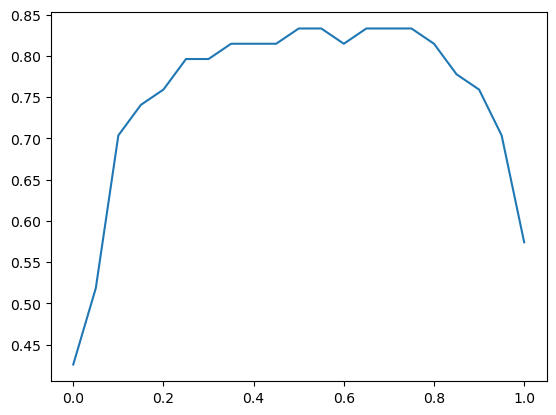

In [525]:
plt.plot(thresholds, scores)

In [526]:
from collections import Counter

In [527]:
Counter(y_pred >= 1.0)

Counter({False: 54})

In [529]:
actual_positive = (y_test == 1)
actual_negative = (y_test == 0)

In [530]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [531]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [532]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [533]:
confusion_matrix = np.array([
    [tn,fp],
    [fn,tp]
])
confusion_matrix

array([[27,  4],
       [ 5, 18]])

In [534]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.5 , 0.07],
       [0.09, 0.33]])

In [535]:
precision = tp / (tp + fp)
precision

0.8181818181818182

In [536]:
recall = tp / (tp + fn)
recall

0.782608695652174

In [537]:
tpr = tp / (tp + fp)
tpr

0.8181818181818182

In [538]:
fpr = fp / ( fp + tn)
fpr

0.12903225806451613

In [539]:
scores = []

thresholds = np.linspace(0,1,101)

for t in thresholds:
    actual_positive = (y_test == 1)
    actual_negative = (y_test == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t,tp,fp,tn,fn))

In [540]:
columns = ['threshold','tp','fp','tn','fn']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,threshold,tp,fp,tn,fn
0,0.00,23,31,0,0
1,0.01,23,30,1,0
2,0.02,23,30,1,0
3,0.03,23,29,2,0
4,0.04,23,27,4,0
...,...,...,...,...,...
96,0.96,5,0,31,18
97,0.97,4,0,31,19
98,0.98,4,0,31,19
99,0.99,2,0,31,21


In [541]:
df_scores['tpr'] = df_scores.tpr = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['fpr'] = df_scores.fpr = df_scores.fp / ( df_scores.fp + df_scores.tn)
df_scores[::10]

,threshold,tp,fp,tn,fn,tpr,fpr
0,0.0,23,31,0,0,0.425926,1.000000
10,0.1,22,15,16,1,0.594595,0.483871
20,0.2,20,10,21,3,0.666667,0.322581
30,0.3,20,8,23,3,0.714286,0.258065
40,0.4,18,5,26,5,0.782609,0.161290
50,0.5,18,4,27,5,0.818182,0.129032
60,0.6,17,4,27,6,0.809524,0.129032
70,0.7,15,1,30,8,0.937500,0.032258
80,0.8,14,1,30,9,0.933333,0.032258
90,0.9,11,1,30,12,0.916667,0.032258


In [568]:
from sklearn.metrics import roc_curve

In [574]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)

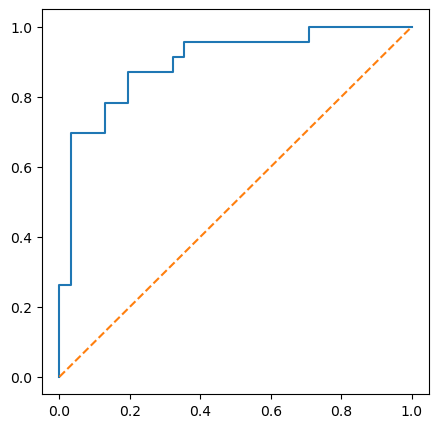

In [575]:
plt.figure(figsize=(5,5))

plt.plot(fpr, tpr, label='model')
plt.plot([0,1], [0,1], label='random', linestyle='--')

In [576]:
from sklearn.metrics import auc
auc(fpr,tpr)

0.8976157082748948

In [578]:
from sklearn.metrics import roc_auc_score

In [579]:
roc_auc_score(y_test, y_pred)

0.8976157082748948

In [580]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer (sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(C=C, max_iter = 1000)
    model.fit(X_train, y_train)
    return dv, model

In [581]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]
    
    return y_pred

In [582]:
from sklearn.model_selection import KFold

In [583]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [584]:
from tqdm.auto import tqdm

In [598]:
n_splits = 5
for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 1.5, 10]):
    scores = []
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.heart_disease.values
        y_val = df_val.heart_disease.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.771 +- 0.066
C=0.01 0.869 +- 0.053
C=0.1 0.899 +- 0.027
C=0.5 0.898 +- 0.019


/home/dell/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dell/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

C=1 0.898 +- 0.016


/home/dell/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dell/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

C=1.5 0.898 +- 0.015


/home/dell/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dell/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

C=10 0.896 +- 0.014


/home/dell/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [593]:
scores

[0.8985507246376812,
 0.9166666666666667,
 0.8837719298245614,
 0.8766233766233766,
 0.9027149321266968]

In [601]:
dv, model = train(df_full_train, df_full_train.heart_disease.values, C=0.1)
y_pred = predict(df_test, dv, model)
auc = roc_auc_score(y_test, y_pred)
auc    

0.9102384291725105